# Линейная регрессия

Модель

$$
y = w_0 +w_1x_1 + w_2X_2 + ... + w_nx_n
$$

или

$$
Y = WX
$$

## Задача регрессии

Создадим датасет в виде прямой с шумами

In [60]:
import numpy as np

X = 2 * np.random.rand(1000, 1)
X[:10]

k = 3
b = 4
y = 4 + 3*X + np.random.randn(1000, 1)
y[:10]

X[:10], y[:10]


(array([[1.96936251],
        [1.14309768],
        [1.53604449],
        [1.66079807],
        [1.35967681],
        [0.91219395],
        [0.61141953],
        [0.91981082],
        [1.20070042],
        [0.77047966]]),
 array([[9.64776   ],
        [7.5757214 ],
        [8.02287202],
        [9.82915575],
        [8.04826957],
        [6.99191517],
        [4.94586335],
        [6.66122218],
        [7.76767955],
        [8.31514461]]))

Определим параметры прямой с использованием линейной регрессии

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

lin_reg.intercept_, lin_reg.coef_

(array([3.95922118]), array([[2.99951683]]))

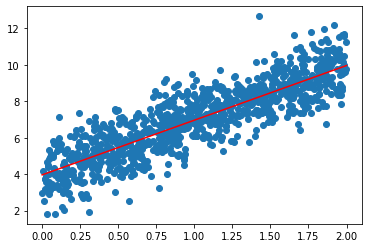

In [65]:
import matplotlib.pyplot as plt

y_predict = lin_reg.predict([[0], [2]])

plt.scatter(X, y)
plt.plot([0, 2],y_predict, c='r')

Оцениим среднеквадратическую ошибку

In [70]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X_test)

print(mean_squared_error(y_test ,y_predict))
_

1.1496810442055188


Реализация без библиотеки

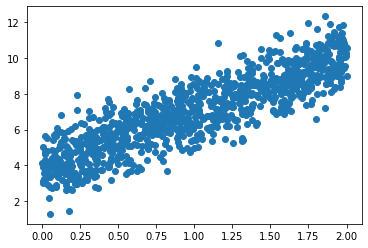

In [71]:
X = 2 * np.random.rand(1000, 1)
X[:10]

k = 3
b = 4
y = 4 + 3*X + np.random.randn(1000, 1)
y[:10]

X_biased = np.c_[np.ones((1000, 1)), X]
X_biased[:10]

plt.scatter(X, y)

In [73]:
X_biased = np.c_[np.ones((1000, 1)), X]
X_biased[:10]

theta_hat = np.linalg.inv(X_biased.T.dot(X_biased)).dot(X_biased.T).dot(y)
theta_hat

array([[3.9097944],
       [3.0832979]])

## Полиномиальная
Создадим датаесет

In [74]:
x_poly = np.linspace(-10, 10, 100)
k0, k1, k2 = 1, 3, 2
x_poly = np.c_[x_poly, x_poly**2]
y_poly = (k0+x_poly[:, 0] *k1+x_poly[:,1]*k2).reshape(-1, 1)
y_poly = y_poly +(np.random.sample((100, 1)) - 0.5)*10

Выведем график

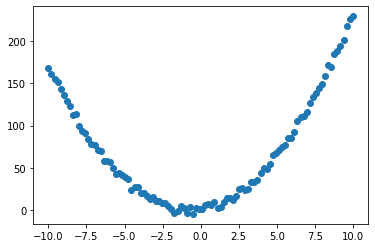

In [75]:
plt.cla()
plt.scatter(x_poly[:,0], y_poly)

Разобьем датасет

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y_poly)

Создадим и обучим модель

In [77]:
model_lin_reg = LinearRegression()
model_lin_reg.fit(x_train, y_train)
y_train_pred = model_lin_reg.predict(x_train)
print('Train MSE: ', mean_squared_error(y_train, y_train_pred))

Train MSE:  8.29828846293178


Проверим на тестовых данных

In [78]:
y_test_pred = model_lin_reg.predict(x_test)
print('Test MSE: ', mean_squared_error(y_test, y_test_pred))

Test MSE:  10.14555718442825


Выведем график

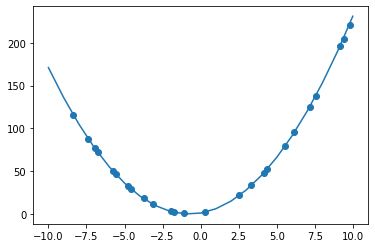

In [79]:
x_true =np.linspace(-10, 10, 21).reshape(-1, 1)
y_true = k0+x_true*k1+x_true**2*k2
plt.cla()
plt.plot(x_true, y_true)
plt.scatter(x_test[:, 0], y_test_pred)

## Функция двух переменных
Создадим датасет

In [80]:
x1 = (np.random.random([100, 1])- 0.5) *20 +(np.random.sample((100, 1)) - 0.5)*10
x2 = (np.random.random([100, 1])- 0.5) *10 +(np.random.sample((100, 1)) - 0.5)*10
x = np.c_[x1, x2]
y = 2*x1-5*x2

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
model_lin_reg = LinearRegression()
model_lin_reg.fit(x_train, y_train)
y_train_pred = model_lin_reg.predict(x_train)
print('Train MSE: ', mean_squared_error(y_train, y_train_pred))

Train MSE:  7.441998737639681e-29


In [82]:
y_test_pred = model_lin_reg.predict(x_test)
print('Test MSE: ', mean_squared_error(y_test, y_test_pred))

Test MSE:  7.405826178214858e-29


# Логистичечкая регрессия для классификации

Принадлежность к классу 1, не принадлежность - 0. Для этого на выход регрессии накладывается функция

$$
\rho(X_i) = \frac{1}{1 - \exp (-X_iW-w_0)}
$$

Классу с наибольшей вероятностью присваивается 1, остальным- 0

Загрузим датасет

In [83]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys()) 

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [85]:
X = iris['data'][:, 3:] # ширина лепестка
y = (iris['target'] == 2).astype(np.int) # 1, если ирис виргинский, иначе О

C:\Users\alexe\AppData\Local\Temp\ipykernel_8448\3198268300.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris['target'] == 2).astype(np.int) # 1, если ирис виргинский, иначе О


Обучение модели

In [86]:
from sklearn.linear_model import LogisticRegression

log_rg = LogisticRegression(solver='lbfgs')
log_rg.fit(X, y)

LogisticRegression()

Вероятности

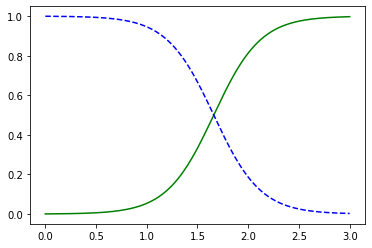

In [87]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) 
y_proba = log_rg.predict_proba(X_new) 
plt.plot(X_new, y_proba[:, 1], "g-" , label="Ирис виргинский" ) 
plt.plot(X_new, y_proba[:, 0], "b--" , label= "Не ирис виргинский" )

In [88]:
log_rg.predict([[1.7], [1.5]]) 

array([1, 0])

## Мультиклассовый случай

In [89]:
from sklearn.metrics import accuracy_score

X = iris['data']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
log_rg = LogisticRegression(solver='lbfgs')
log_rg.fit(X_train, y_train)
y_predict = log_rg.predict(X_test)
accuracy_score(y_test, y_predict)

0.9736842105263158

# Гребневая регрессия

Оптимизируется целевой функционал

$$
|| y - WX ||_2^2 + \alpha ||w||_2^2
$$

Позволяет ограничить величину коэффициентов. Это эффективно помогает при коллинеарных данных.

Большему значению параметра $\alpha$ соответсвует большее ограничение коэффициентов, что способствует робастности по отношению к колинеарности.

## Пример использования

In [90]:
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=10000, noise=10, n_features=10, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
ridge_rg =Ridge(alpha=0.1, fit_intercept=True)
ridge_rg.fit(X_train, y_train)
y_test_predict = ridge_rg.predict(X_test)
y_test_predict, len(y_test_predict)
mean_squared_error(y_test, y_test_predict)

103.65965988231086

## Настройка параметра гребневой регрессии

In [92]:
from sklearn.linear_model import RidgeCV
reg = RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])


reg.alpha_

0.01

# LASSO регрессия

Оптимизируется целевой функционал

$$
\frac{1}{2n_{samples}}|| y - WX ||_2^2 + \alpha ||w||_1
$$

Позволяет ограничить величину коэффициентов. Это эффективно помогает при коллинеарных данных.

Большему значению параметра $\alpha$ соответсвует большее ограничение коэффициентов, что способствует робастности по отношению к колинеарности.

## Пример использования

In [93]:
from sklearn.linear_model import Lasso

lasso_rg = Lasso(alpha=0.1)
lasso_rg.fit(X_train, y_train)
y_test_predict = ridge_rg.predict(X_test)
mean_squared_error(y_test, y_test_predict)

103.65965988231086

## Elastic net

Является сместью гребневой и LASSO. Оптимизируется целевой функционал

$$
\frac{1}{2n_{samples}}|| y - WX ||_2^2 + \alpha  \rho||w||_1 + \frac{\alpha(1-\rho)}{2}||w||_2^2
$$

In [ ]:
from sklearn.linear_model import ElasticNet

elnet_rg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elnet_rg.fit(X_train, y_train)
y_test_predict = elnet_rg.predict(X_test)
mean_squared_error(y_test, y_test_predict)

159.7054120313165

# Градиентный спуск

$$
w(k) = w(k-1) -\lambda \nabla w
$$

Линенйный набор с нулями

In [94]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)
X_biased = np.c_[np.ones((100, 1)), X]

In [95]:
eta = 0.1
n_iterations = 1000
theta = np.random.randn(2, 1)

m = 100
for iteration in range(n_iterations):
    gradients = 2 / m * X_biased.T.dot(X_biased.dot(theta) - y)
    theta = theta - eta*gradients

theta

array([[4.11024579],
       [3.04149905]])

## Стохастический градиентный спуск

При рассчете градиента на каждой итерации считается градиент только по одному случайному параметру. Значительно снижает вычислительную сложность, но повышает количество эпох

In [96]:
n_epochs = 100
t0, t1 = 50, 1000

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_biased[random_index: random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 / m * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + 1)
        theta = theta - eta*gradients
        
theta

array([[4.03148819],
       [3.0834853 ]])

Через библиотеку

In [97]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=100, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.13936835]), array([3.09120467]))

## Мини-пакетный градиентный спуск

Как стохастический, но подаются случайные небольшие пачки данных

In [98]:
batch_size = 10
n_iter = 500
sgd_mini_reg = SGDRegressor()
for iteration in range(n_iterations):
    mini_indexes = np.random.choice(len(X_biased), size=batch_size)
    X_mini = X_biased[mini_indexes]
    y_mini = y[mini_indexes]
    sgd_mini_reg.partial_fit(X_mini, y_mini.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.13936835]), array([3.09120467]))